In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
%matplotlib inline  

In [108]:
from sklearn.model_selection import GridSearchCV


In [194]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [196]:
import warnings
warnings.filterwarnings("ignore")

In [209]:
dftrain = pd.read_csv(r"/Users/aleenaalby/Desktop/adult(1).data")

In [210]:
dftest = pd.read_csv(r"/Users/aleenaalby/Desktop/adulttest (1).test")

In [211]:
dftrain

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [212]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   maritalstatus   32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [213]:
dftest

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [214]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   maritalstatus   16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [215]:
dftrain.replace(' ?', 'other', inplace=True)
dftest.replace(' ?', 'other', inplace=True)

In [225]:
# defining function for estimating missing values in each columns
def missingvalues(df):
    missing=[]
    col_list=df.columns
    for i in col_list:
        missingvalue=df[i].isnull().sum()
        missing.append(missingvalue)
    list_of_missing=pd.DataFrame(list(zip(col_list,missing)))
    return list_of_missing

In [239]:
missingvalues(dftest)

,0,1
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education-num,0
5,maritalstatus,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


In [240]:
missingvalues(dftrain)

,0,1
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,education-num,0
5,maritalstatus,0
6,occupation,0
7,relationship,0
8,race,0
9,sex,0


In [126]:
dftrain['salary'] = dftrain['salary'].apply(lambda x: 1 if x==' >50K' else 0)
dftest['salary'] = dftest['salary'].apply(lambda x: 1 if x==' >50K.' else 0)

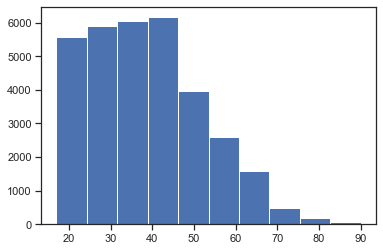

In [127]:
plt.hist(dftrain['age']);



Age looks skewed, it needs to be normalized. It'll be done later with sklearn.preprocessing.StandardScaller().


Workclass

In [128]:
dftrain.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
other                 1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

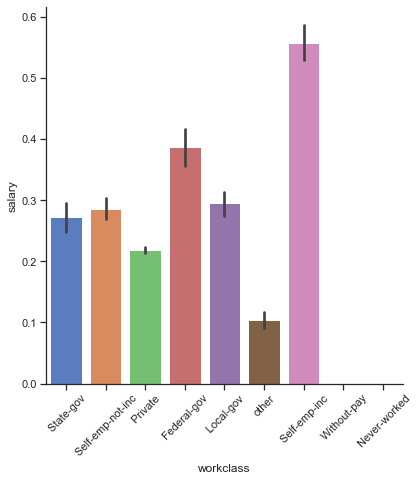

In [129]:
sns.factorplot(x="workclass", y="salary", data=dftrain, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);



As Never-worked and Without-pay look very similar, we merge them

In [130]:
dftrain['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
dftest['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

fnlgwt

In [131]:
dftrain['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64



Fnlgwt feature has high numers and big sandard deviation, let's take logarithm of that.


In [132]:
dftrain['fnlwgt'] = dftrain['fnlwgt'].apply(lambda x: np.log1p(x))
dftest['fnlwgt'] = dftest['fnlwgt'].apply(lambda x: np.log1p(x))

In [133]:
dftrain['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

Education

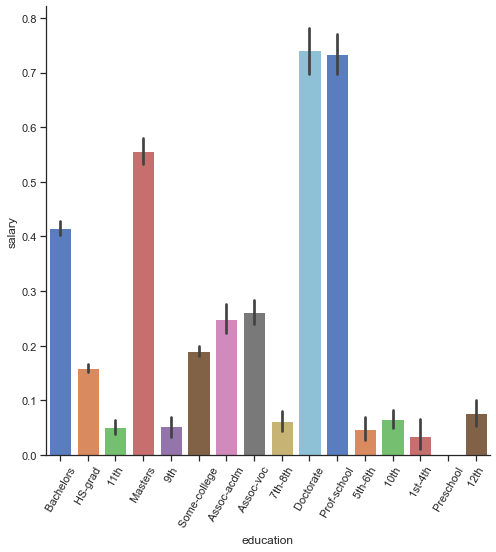

In [134]:
sns.factorplot(x="education",y="salary",data=dftrain,kind="bar", size = 7, 
palette = "muted")
plt.xticks(rotation=60);



Primary education is divided into grades, they all give almost the same result. We can merge them into one feature - Primary

In [135]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [136]:
dftrain['education'] = dftrain['education'].apply(primary)
dftest['education'] = dftest['education'].apply(primary)

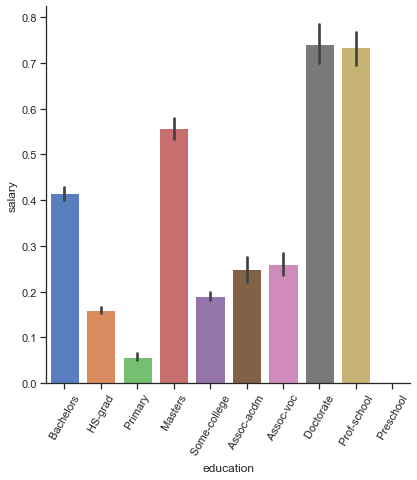

In [137]:
sns.factorplot(x="education",y="salary",data=dftrain,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

Education num

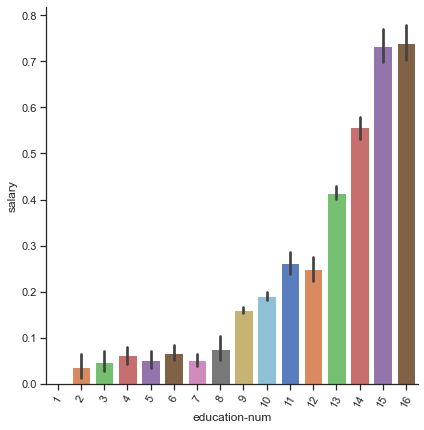

In [138]:
sns.factorplot(x="education-num",y="salary",data=dftrain,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

Marital Status

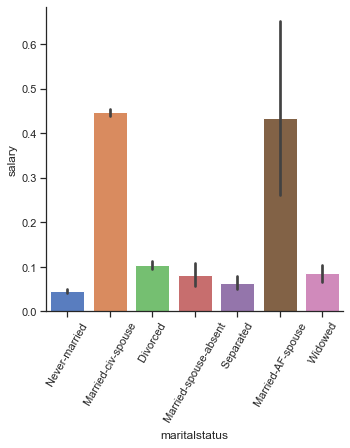

In [139]:
sns.factorplot(x="maritalstatus",y="salary",data=dftrain,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

In [140]:
dftrain['maritalstatus'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

There are very few Married-AF-spouse features. They are similar to Married-civ-spouse, so we can merge them

In [141]:
dftrain['maritalstatus'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
dftest['maritalstatus'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

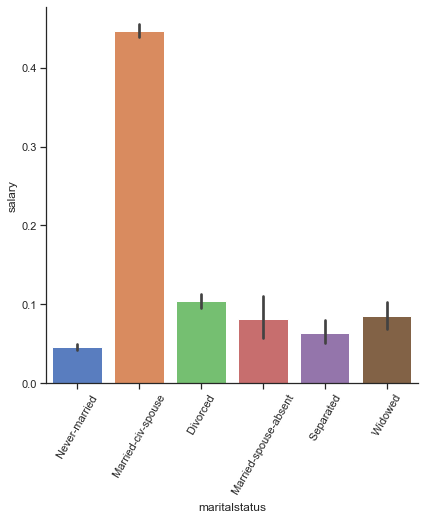

In [143]:
sns.factorplot(x="maritalstatus",y="salary",data=dftrain,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

Occupation

In [144]:
dftrain['occupation'].fillna(' 0', inplace=True)
dftest['occupation'].fillna(' 0', inplace=True)

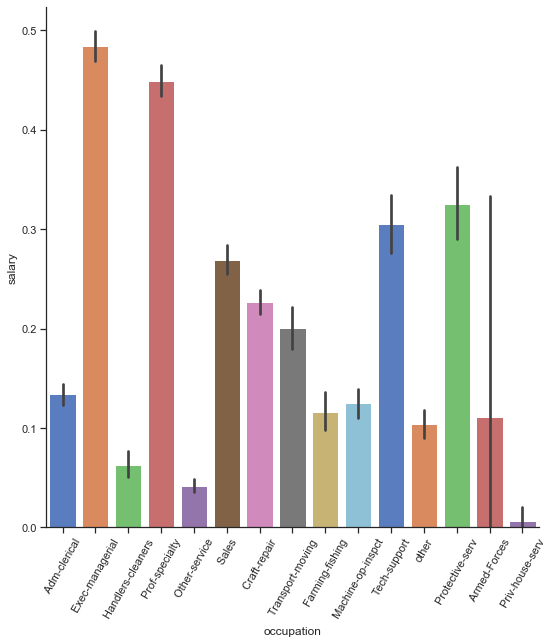

In [145]:
sns.factorplot(x="occupation",y="salary",data=dftrain,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

In [146]:
dftrain['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
other                 1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Everything looks good, except Armed-Forces. They are similar to 0 and that's what we replace them with.

In [147]:
dftrain['occupation'].replace(' Armed-Forces', 'other', inplace=True)
dftest['occupation'].replace(' Armed-Forces', 'other', inplace=True)

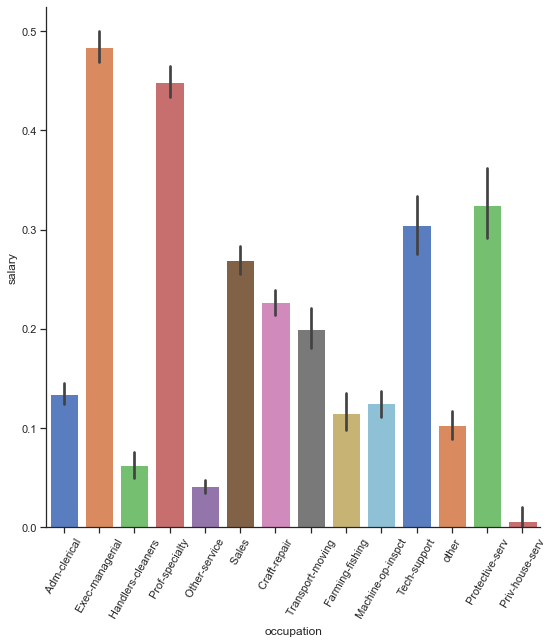

In [148]:
sns.factorplot(x="occupation",y="salary",data=dftrain,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

Relationship

In [149]:
dftrain.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

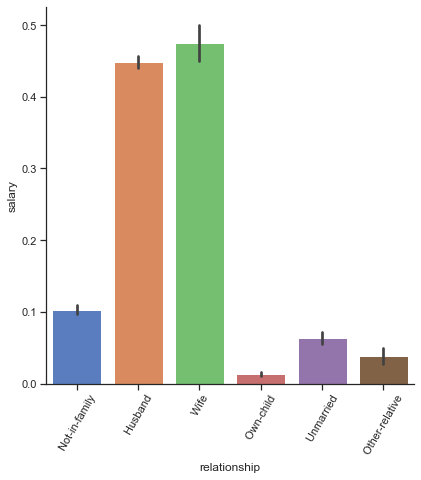

In [150]:
sns.factorplot(x="relationship",y="salary",data=dftrain,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

Race

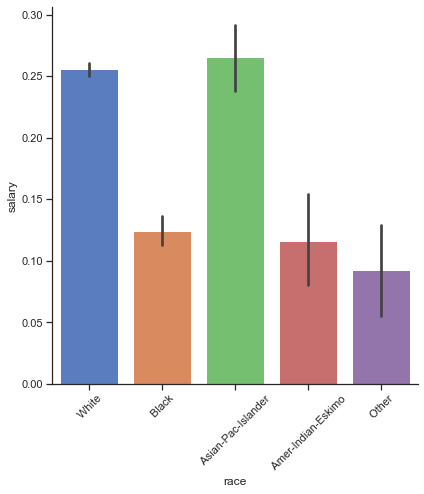

In [151]:
sns.factorplot(x="race",y="salary",data=dftrain,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [152]:
dftrain['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

Sex

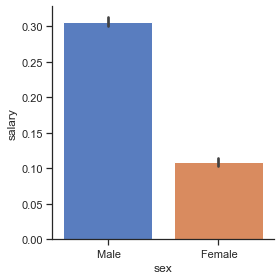

In [153]:
sns.factorplot(x="sex",y="salary",data=dftrain,kind="bar", size = 4, 
palette = "muted");

Capital Gain , Capital Loss, Hours/Week

These features just need to be standarized.

Native country

In [154]:
dftrain['native-country'].fillna(' 0', inplace=True)
dftest['native-country'].fillna(' 0', inplace=True)

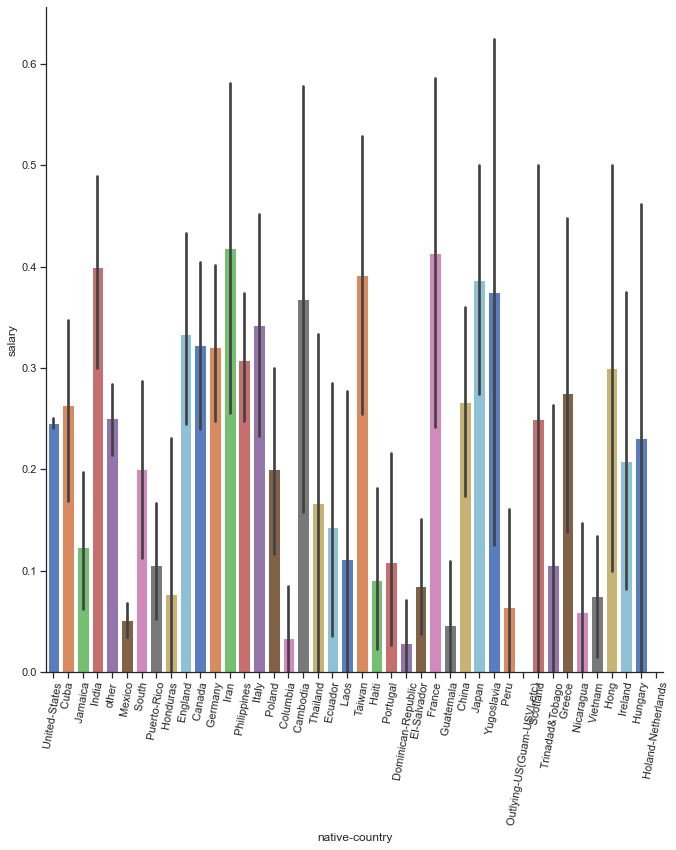

In [155]:
sns.factorplot(x="native-country",y="salary",data=dftrain,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);

We need to segregate these countries into a few categories

In [156]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country

In [157]:
dftrain['native-country'] = dftrain['native-country'].apply(native)
dftest['native-country'] = dftest['native-country'].apply(native)

In [158]:
dftrain['native-country'].value_counts()

US             29265
Poor            1415
Western          677
other            583
Eastern          386
Poland team      235
Name: native-country, dtype: int64

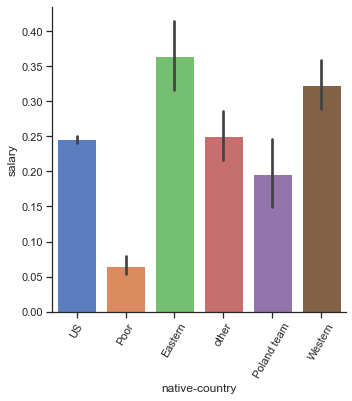

In [159]:
sns.factorplot(x="native-country",y="salary",data=dftrain,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

In [160]:
def countplot2(df, column, target):
    plt.figure(figsize=(15,10))
    sns.countplot(x = df[column], hue=df[target], data=pd.melt(df))

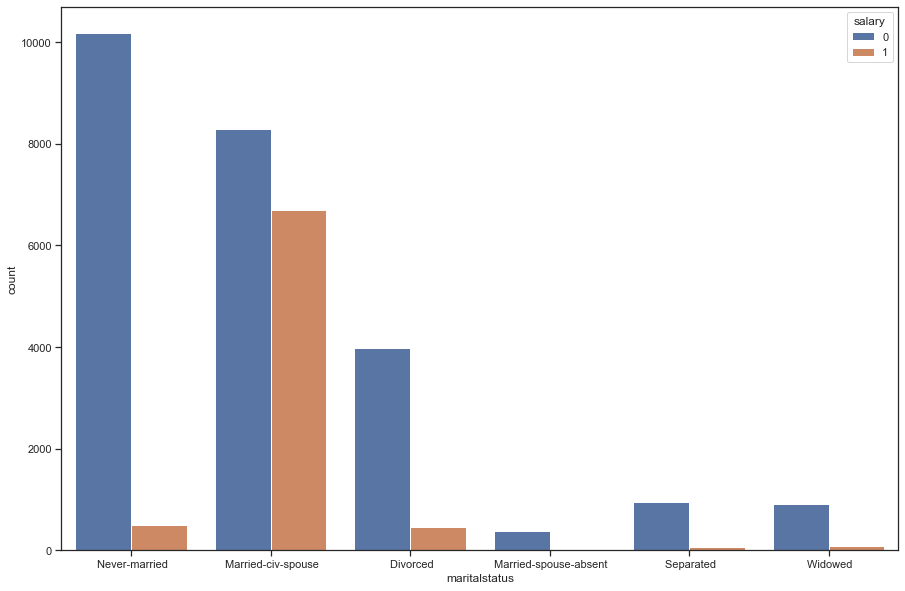

In [161]:
countplot2(dftrain, "maritalstatus", "salary")

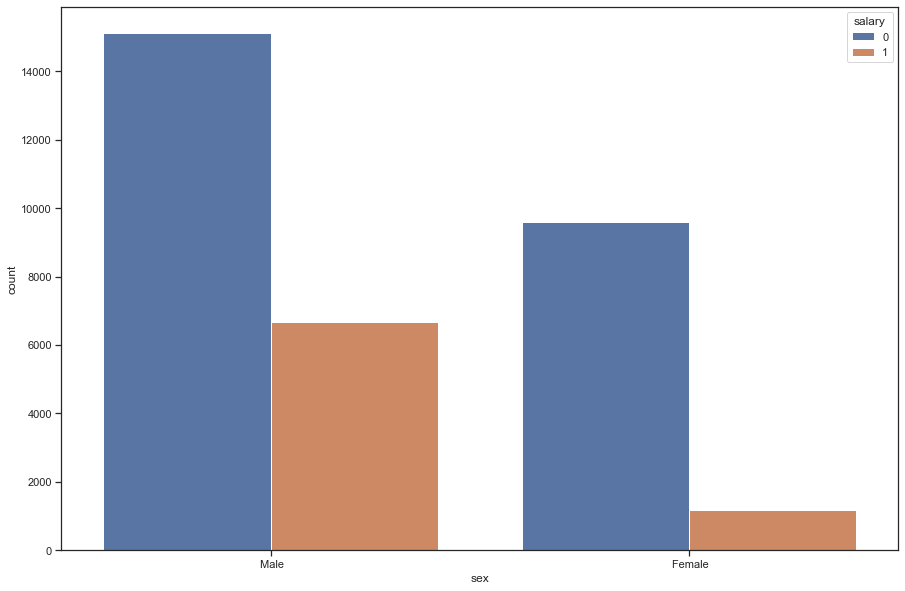

In [162]:
countplot2(dftrain, "sex", "salary")

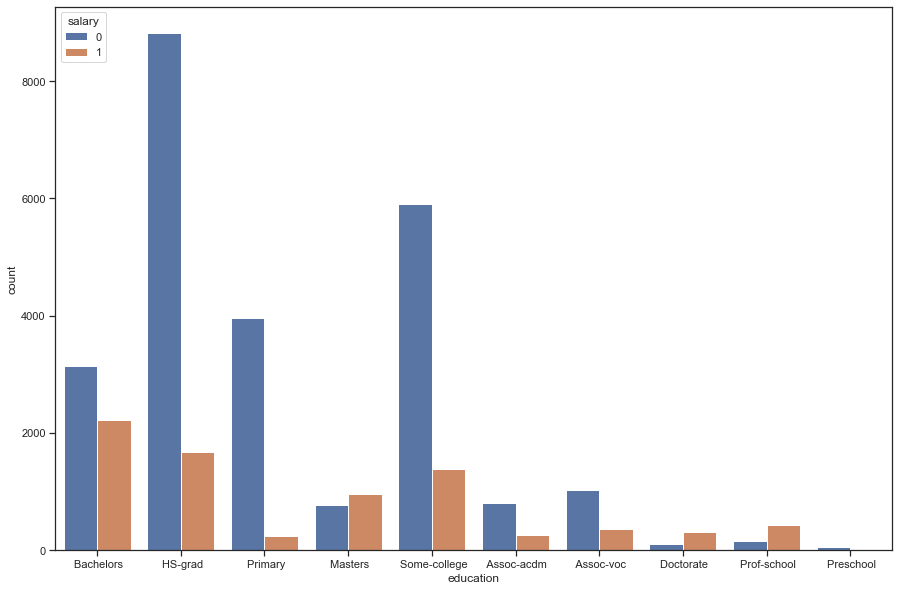

In [163]:
countplot2(dftrain, "education", "salary")

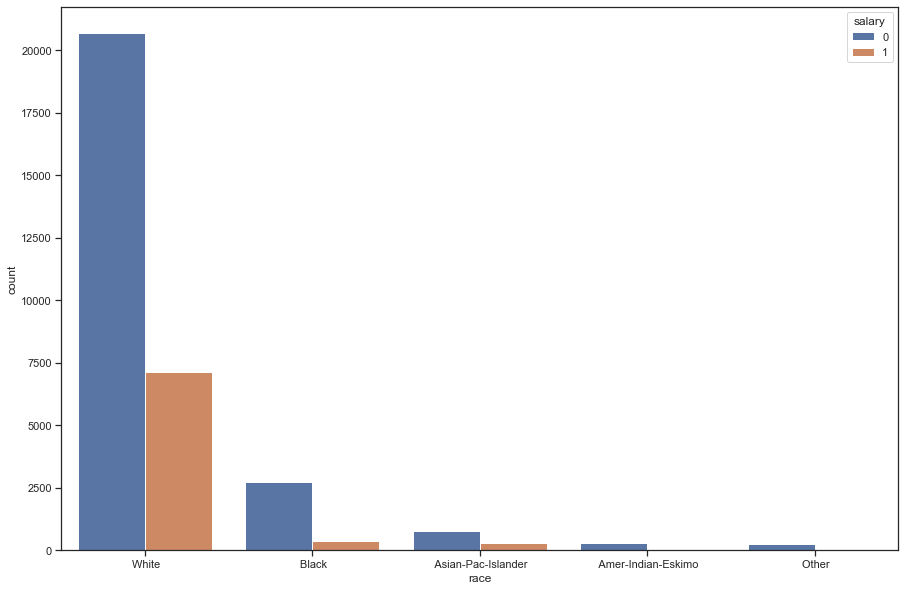

In [164]:
countplot2(dftrain, "race", "salary")

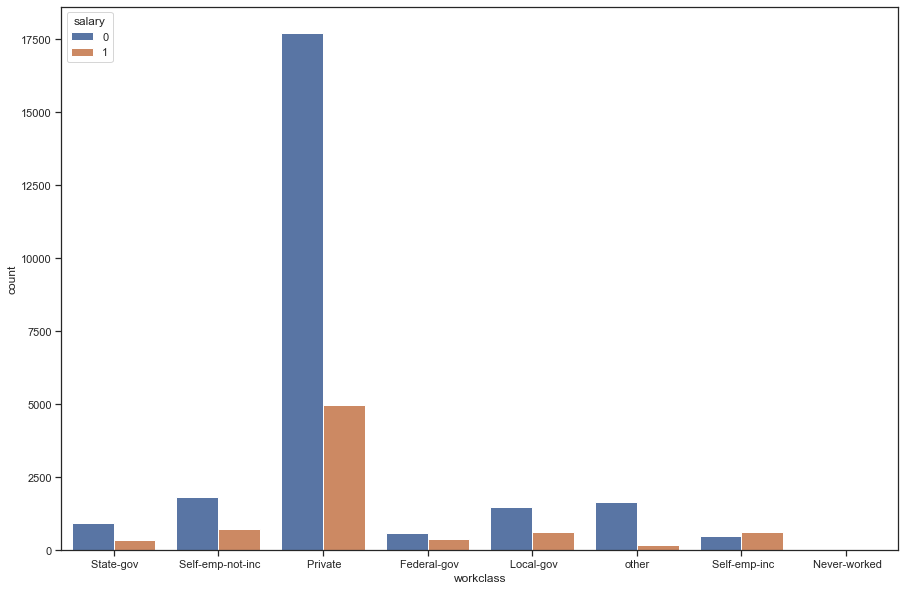

In [165]:
countplot2(dftrain, "workclass", "salary")

In [166]:
print(dftest.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [167]:
print(dftrain.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


One-hot encoding

In [168]:
#merge datasets
joint = pd.concat([dftrain, dftest], axis=0)

In [242]:
joint.dtypes

age                             int64
fnlwgt                        float64
education-num                   int64
capital-gain                    int64
capital-loss                    int64
                               ...   
native-country:Poland team      uint8
native-country:Poor             uint8
native-country:US               uint8
native-country:Western          uint8
native-country:other            uint8
Length: 64, dtype: object

In [245]:
#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())

In [246]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [247]:
joint.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,race: Other,race: White,sex: Female,sex: Male,native-country:Eastern,native-country:Poland team,native-country:Poor,native-country:US,native-country:Western,native-country:other
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [173]:
train = joint.head(dftrain.shape[0])
test = joint.tail(dftest.shape[0])

In [174]:
train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,race: Other,race: White,sex: Female,sex: Male,native-country:Eastern,native-country:Poland team,native-country:Poor,native-country:US,native-country:Western,native-country:other
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12.458010,12,0,0,38,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
32557,40,11.947140,9,0,0,40,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
32558,58,11.931050,9,0,0,40,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
32559,22,12.213500,9,0,0,20,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [175]:
test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,race: Other,race: White,sex: Female,sex: Male,native-country:Eastern,native-country:Poland team,native-country:Poor,native-country:US,native-country:Western,native-country:other
0,25,12.331837,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,38,11.405507,9,0,0,50,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,28,12.727696,12,0,0,40,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,44,11.984952,10,7688,0,40,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,18,11.547308,10,0,0,30,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,12.280345,13,0,0,36,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
16277,64,12.680454,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
16278,38,12.834639,13,0,0,50,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
16279,44,11.337286,13,5455,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [176]:
Xtrain = train.drop('salary', axis=1)
ytrain = train['salary']

Xtest = test.drop('salary', axis=1)
ytest = test['salary']

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Logistic regression data prediction

In [177]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10]}
grid1 = GridSearchCV(lr, param_grid).fit(Xtrain, ytrain)
print("Grid Logistic Regression: ", grid1.best_score_, grid1.best_params_)

Grid Logistic Regression:  0.8525845304288417 {'C': 0.1}


In [192]:
ypred=grid1.predict(Xtest)

In [235]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13482
           1       0.57      0.78      0.66      2799

    accuracy                           0.86     16281
   macro avg       0.76      0.83      0.78     16281
weighted avg       0.88      0.86      0.87     16281



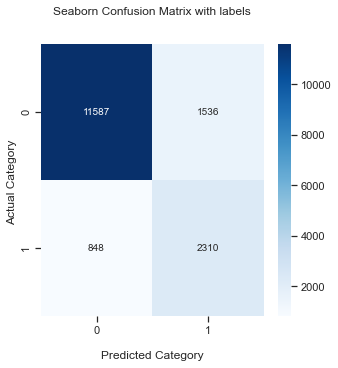

In [180]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(ypred, ytest)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [182]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain, ytrain)

SVC()

In [183]:
ypred=svc.predict(Xtest)

In [236]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13482
           1       0.57      0.78      0.66      2799

    accuracy                           0.86     16281
   macro avg       0.76      0.83      0.78     16281
weighted avg       0.88      0.86      0.87     16281



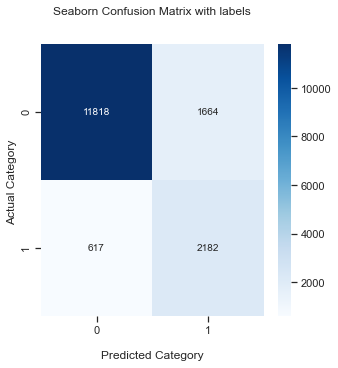

In [237]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(ypred, ytest)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'max_depth': [10, 40, 70, 100, 400, 700, None],
              'criterion': ['gini','entropy']}
grid1 = GridSearchCV(dtc, param_grid).fit(Xtrain, ytrain)
print("Grid DTC: ", grid1.best_score_, grid1.best_params_)



Grid DTC:  0.8558092989979217 {'criterion': 'entropy', 'max_depth': 10}


In [187]:
ypred=grid1.predict(Xtest)

In [188]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     13482
           1       0.57      0.78      0.66      2799

    accuracy                           0.86     16281
   macro avg       0.76      0.83      0.78     16281
weighted avg       0.88      0.86      0.87     16281



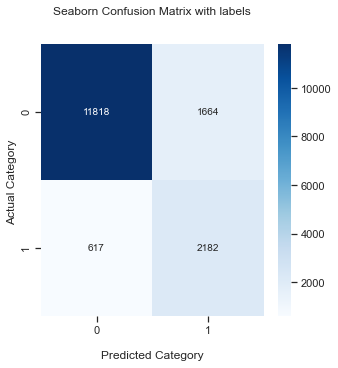

In [238]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(ypred, ytest)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()